12/27/2017


# Political blogs analysis

## Summary
Analysis of Adamic/Glance political blogs in terms of homophily/monophily + political prediction. Code organization assumes working directory is notebook folder location.


In [1]:
## implemented LINK with solver='lbfgs'
from __future__ import division
from matplotlib.backends.backend_pdf import PdfPages
import os

## relevant libraries
execfile('../functions/python_libraries.py')

## processing datasets
execfile('../functions/create_adjacency_matrix.py') 
execfile('../functions/create_directed_adjacency_matrix.py')

execfile('../functions/compute_homophily.py')
execfile('../functions/compute_monophily.py')
execfile('../functions/compute_homophily_p_value.py')
## updated
execfile('../functions/compute_chi_square.py')

execfile('../functions/parsing.py')
execfile('../functions/mixing.py')

## code for gender prediction 
execfile('../functions/LINK_finalized.py')
execfile('../functions/majority_vote.py')
execfile('../functions/ZGL.py')
execfile('../functions/benchmark_classifier.py')
execfile( '../functions/majority_vote_modified.py')
execfile('../functions/SI_functions/majority_vote_modified_SI.py')

## gender preference distribution
execfile('../functions/compute_null_distribution.py')

/Users/jugander/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/jugander/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## set data file directory paths

In [2]:
pol_blogs_file_path = '/Users/kristen/Dropbox/gender_graph_data/manuscript/nature_hb/3_nature_hb_running_list_of_revisions_post_may_2017/'
pol_blogs_file_path = '/Users/jugander/Dropbox/research/GenderGraph/manuscript/nature_hb/3_nature_hb_running_list_of_revisions_post_may_2017/'

# Load Political Blogs dataset
* downloaded dataset from Newman site: http://www-personal.umich.edu/~mejn/netdata/
* dataset description: Political blogs: A directed network of hyperlinks between weblogs on US politics, recorded in 2005 by Adamic and Glance. Please cite L. A. Adamic and N. Glance, "The political blogosphere and the 2004 US Election", in Proceedings of the WWW-2005 Workshop on the Weblogging Ecosystem (2005). Thanks to Lada Adamic for permission to post these data on this web site.
* note that I've manually added "multigraph 1" into the header so networkx can recognize.
* https://www.cise.ufl.edu/research/sparse/matrices/Newman/polblogs -- our #s match these numbers
* and our #s also match these #s: http://moreno.ss.uci.edu/data.html#blogs

In [3]:
## set node attributes 
## error: https://groups.google.com/forum/#!topic/networkx-discuss/kF2sbuLjGwY
## per Aric's comment -- I added "multigraph 1" in the header.
nw_polblogs = nx.read_gml(pol_blogs_file_path + './data/polblogs_newman/polblogs.gml')

### set-up network, largest connected component, ignore NA nodes, etc. like with FB100 and Add Health data processing

In [4]:
(values_undirected,adj) = create_adj_membership(nw_polblogs.to_undirected(reciprocal=False),
                              nx.get_node_attributes(nw_polblogs, 'value'),
                              None,
                              'yes',
                               0,
                                None,
                          'gender')

In [5]:
print np.shape(adj)

(1222, 1222)


## Versions of the Network to Work With:
for main paper, we work with undirected, unweighted network; and create out- and in-directed versions of NW for SI.


In [7]:
## 2. out-directed; unweighted
(pol_out, adj_out) = create_directed_adj_membership(nw_polblogs,
                              nx.get_node_attributes(nw_polblogs, 'value'),
                              None,
                              'yes',
                               0,
                               'out',
                               'gender')
pol_out = np.array(map(np.int,pol_out))
adj_out = (adj_out>=1)+0
print np.shape(adj_out)

(1033, 1033)


In [8]:
## 3. in-directed; unweighted
(pol_in, adj_in) = create_directed_adj_membership(nw_polblogs,
                              nx.get_node_attributes(nw_polblogs, 'value'),
                              None,
                              'yes',
                               0,
                               'in',
                               'gender')
pol_in = np.array(map(np.int,pol_in))
adj_in = (adj_in>=1)+0
print np.shape(adj_in)

(976, 976)


## Compute Homophily and Monophily Values

In [9]:
print np.unique(values_undirected)
print np.sum(values_undirected==0)
print np.sum(values_undirected==1)
#0 (left or liberal)
#  1 (right or conservative)
F_fb_label = 0
M_fb_label = 1

[0 1]
586
636


# homophily

#### homophily on undirected:

In [10]:
homophily_political =  homophily_index_Jackson_alternative(adj,
                                                           values_undirected) # observed homophily

In [11]:
homophily_political

[0.9026074092338039, 0.9088706886607452]

In [12]:
print np.mean(values_undirected==0)
print np.mean(values_undirected==1)

0.4795417348608838
0.5204582651391162


In [13]:
print homophily_intercept_p_value(adj,
                         values_undirected)

[[0.]
 [0.]]


#### homophily on out-directed:

In [14]:
homophily_political_out =  homophily_index_Jackson_alternative(adj_out, 
                                                           pol_out) # observed homophily
print homophily_political_out

[0.9269863994273444, 0.9099933080526433]


#### homophily on in-directed

In [15]:
homophily_political_in =  homophily_index_Jackson_alternative(adj_in, 
                                                           pol_in) # observed homophily
print homophily_political_in

[0.9055183946488294, 0.9256216696269981]


# monophily



#### monophily on undirected:

In [16]:
monophily_political = monophily_index_overdispersion_Williams(adj, 
                                                              values_undirected)
print monophily_political ## check the possible range of values here

[0.23068324233380158, 0.18690770001432608]


In [17]:
## check p-value
## compute with p-values
print compute_chi_square_statistic(adj, values_undirected)

[0.0, 0.0]


#### monophily on out-directed:

In [18]:
monophily_political_out = monophily_index_overdispersion_Williams(adj_out, 
                                                              pol_out)
print monophily_political_out

[0.24245094931031005, 0.18729321159959025]


In [19]:
print compute_chi_square_statistic(adj_out, pol_out)

[0.0, 0.0]


#### monophily on in-directed:

In [20]:
monophily_political_in = monophily_index_overdispersion_Williams(adj_in, 
                                                              pol_in)
print monophily_political_in

[0.25487497016641913, 0.13122892264726063]


In [21]:
#F
in_F_degree = adj[values_undirected==F_fb_label,] * np.matrix((values_undirected==F_fb_label)+0).T
total_F_degree = np.sum(adj[values_undirected==F_fb_label,] ,1)
h_F = np.mean(in_F_degree)/np.mean(total_F_degree)
print h_F
print homophily_political[0]
print ''
#M
in_M_degree = adj[values_undirected==M_fb_label,] * np.matrix((values_undirected==M_fb_label)+0).T
total_M_degree = np.sum(adj[values_undirected==M_fb_label,] ,1)
h_M = np.mean(in_M_degree)/np.mean(total_M_degree)
print h_M
print homophily_political[1]


0.9026074092338039
0.9026074092338039

0.9088706886607452
0.9088706886607452


In [22]:
n_iter = 100000
d_iF = map(np.int,np.array(total_F_degree.T)[0])

mc_F = []
for j in range(n_iter):
    mc_F.append( np.random.binomial(n=map(np.int,np.array(total_F_degree.T)[0]), p=h_F)/d_iF)
    
mc_F_final = np.array(mc_F).flatten()

total_M_degree = np.sum(adj[values_undirected==M_fb_label,] ,1)
d_iM = map(np.int,np.array(total_M_degree.T)[0])


mc_M = []
for j in range(n_iter):
    mc_M.append( np.random.binomial(n=map(np.int,np.array(total_M_degree.T)[0]), p=h_M)/d_iM)
    
mc_M_final = np.array(mc_M).flatten()

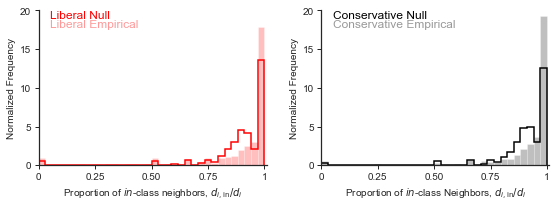

In [23]:
alpha_empirical = 0.4
y_max = 20
%matplotlib inline
nbins = 35
f, (ax1, ax2) = plt.subplots(1, 2, 
                             sharey=False, sharex=False,
                            figsize=(8, 3))
plt.setp(ax1, 
         xticks=[0,0.25, 0.5, 0.75, 1], 
         xticklabels=['0', '0.25', '0.50', '0.75', '1'])
ax1.set_xticks([0,0.25, 0.5, 0.75, 1])
ax1.minorticks_on()
ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)


ax1.hist(in_F_degree/total_F_degree,
         bins = np.linspace(0,1,nbins),
         normed = True,
         edgecolor = 'white',
         color='red',
         alpha=0.25)

ax1.hist(mc_F_final,
         bins = np.linspace(0,1,nbins),
         normed = True,
         edgecolor = 'red',histtype='step',
         color='white',alpha=1,lw=1.5)

ax1.set_ylabel('Normalized Frequency')
ax1.set_xlabel('Proportion of $in$-class neighbors, $d_{i,\\mathrm{in}}/d_i$')
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.set_ylim(0,y_max)
ax1.set_xlim(0,1.01)

ax2.set_ylim(0,y_max)
ax2.set_xlim(0,1.01)
plt.setp(ax2, xticks=[0,0.25, 0.5, 0.75, 1], xticklabels=['0', '0.25', '0.50', '0.75', '1'])
ax2.set_xticks([0,0.25, 0.5, 0.75, 1])
ax2.minorticks_on()
ax2.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)

ax2.hist(in_M_degree/total_M_degree,
         bins = np.linspace(0,1,nbins),
         normed = True,
         edgecolor = 'white',
        color='black',alpha=0.25)
ax2.hist(mc_M_final,
         bins = np.linspace(0,1,nbins),
         normed = True,
         edgecolor = 'black',histtype='step',
        color='white',alpha=1,lw=1.5)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.set_xlabel('Proportion of $in$-class Neighbors, $d_{i,\\mathrm{in}}/d_i$')
ax2.set_ylabel('Normalized Frequency')

ax1.annotate('Liberal Null', xy=(0.05,19), 
                 color='red', alpha=1, size=12)
ax1.annotate('Liberal Empirical', xy=(0.05,17.8), 
                 color='red', alpha=alpha_empirical, size=12)
ax2.annotate('Conservative Null', xy=(0.05,19), 
                 color='black', alpha=1, size=12)
ax2.annotate('Conservative Empirical', xy=(0.05,17.8), 
                 color='black', alpha=alpha_empirical, size=12)
plt.tight_layout()
pp = PdfPages('../../figures/pol_blogs_proportion_degree_same_on_undirected.pdf')
pp.savefig()
pp.close()

# %changeAUC@khop Plot

In [24]:
k_hop = np.array([1,2,3,4,5])
class_values = np.unique(values_undirected)

In [25]:
auc_array = []
for k in k_hop:  
    print k
    adj_amherst_k= np.matrix(adj)**k
    adj_amherst_k[range(adj_amherst_k.shape[0]),range(adj_amherst_k.shape[0])]=0 ## remove self-loops
                              
    mv_g1 = (adj_amherst_k[values_undirected==class_values[0],:] * np.matrix((values_undirected==class_values[0])+0).T)/np.sum(adj_amherst_k[values_undirected==class_values[0],:],1)
    mv_g2 = (adj_amherst_k[values_undirected==class_values[1],:] * np.matrix((values_undirected==class_values[1])+0).T)/np.sum(adj_amherst_k[values_undirected==class_values[1],:],1)
    proportion_majority_same = np.mean(np.concatenate((np.array(mv_g1).T[0]>np.mean(values_undirected==class_values[0]),
                                                                       np.array(mv_g2).T[0]>np.mean(values_undirected==class_values[1]))))

    y_score = np.array(np.concatenate((1-mv_g1,mv_g2))).T[0]
    y_test = np.concatenate((np.repeat(class_values[0],len(mv_g1)),
                                             np.repeat(class_values[1],len(mv_g2))))

    auc_score = sklearn.metrics.roc_auc_score(label_binarize(y_test, np.unique(y_test)),
                                    y_score)
    auc_array.append(auc_score)

1
2
3
4
5


In [26]:
print auc_array

[0.967948408354262, 0.9740874600210359, 0.9727579582286904, 0.9725406229205573, 0.9725245240088437]


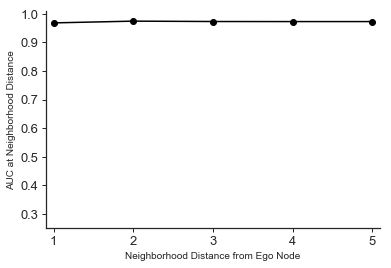

In [27]:
%matplotlib inline
from matplotlib.ticker import FixedLocator,LinearLocator,MultipleLocator, FormatStrFormatter

fig = plt.figure()
seaborn.set_style(style='white')
from mpl_toolkits.axes_grid1 import Grid
grid = Grid(fig, rect=111, nrows_ncols=(1,1),
            axes_pad=0.1, label_mode='L')
for i in range(4):
    if i == 0:
        grid[i].xaxis.set_major_locator(FixedLocator([1,2,3,4,5]))
        grid[i].yaxis.set_major_locator(FixedLocator([0.3,0.4, 0.5,0.6,0.7,0.8,0.9,1]))

        grid[i].plot(k_hop,
           auc_array, color = 'black')
        grid[i].scatter(k_hop,
           auc_array, color = 'black')

        grid[i].set_xlim(0.9,5.1)
        grid[i].set_ylim(0.25,1.01)

        grid[i].spines['right'].set_visible(False)
        grid[i].spines['top'].set_visible(False)
        grid[i].tick_params(axis='both', which='major', labelsize=13)
        grid[i].tick_params(axis='both', which='minor', labelsize=13)
        grid[i].set_xlabel('Neighborhood Distance from Ego Node')
        grid[i].set_ylabel('AUC at Neighborhood Distance')

grid[0].set_xticks([1,2,3,4,5])
grid[0].set_yticks([ 0.3,0.4, 0.5,0.6,0.7,0.8,0.9,1])


grid[0].minorticks_on()
grid[0].tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
pp = PdfPages('../../figures/khop_vs_AUC_pol_blogs_NHB_figure_python.pdf')
pp.savefig()
pp.close()
plt.show()


# Prediction Set-Up
Link, 1-hop MV, 2-hop MV, ZGL

## LINK Logistic Regression

In [28]:
percent_initially_unlabelled = [0.95,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.05,0.01]
percent_initially_labelled = np.subtract(1, percent_initially_unlabelled)

In [29]:
n_iter = 100

In [30]:
from sklearn.metrics import f1_score

In [31]:
(mean_accuracy_amherst, se_accuracy_amherst, 
 mean_micro_auc_amherst, se_micro_auc_amherst, 
 mean_wt_auc_amherst_lbfgs, se_wt_auc_amherst) = LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                              np.array(values_undirected), ## gender labels 
                                                              adj,#nx.adj_matrix(nw_polblogs_undirected,
                                                                           #nodelist = nw_polblogs_undirected.nodes()).todense(),#np.array(nx.adj_matrix(nw_polblogs_undirected).todense()), ## adjacency matrix
                                                              clf = linear_model.LogisticRegression(penalty='l2',
                                                                                                    fit_intercept = False,
                                                                                                    solver='lbfgs',
                                                                                                    C=1),num_iter=n_iter)

0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.01


## Baseline Classifier

In [32]:
(mean_wt_auc_baseline_amherst, se_wt_auc_baseline_amherst) = random_classifier(adj,#np.array(nx.adj_matrix(nw_polblogs_undirected,
                                                                              #                      nodelist = nw_polblogs_undirected.nodes()).todense()),
                                                                             np.array(values_undirected),
                                                                            percent_initially_unlabelled,
                                                                             num_iter=n_iter)

0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.01


## 1-hop MV

In [33]:
(mean_accuracy_mv_amherst, se_accuracy_mv_amherst, 
 mean_micro_auc_mv_amherst, se_micro_auc_mv_amherst, 
 mean_wt_auc_mv_amherst, se_wt_auc_mv_amherst) =majority_vote_modified(percent_initially_unlabelled,  
                                                                np.array(values_undirected), 
                                                                adj,#np.array(nx.adj_matrix(nw_polblogs_undirected,
                                                                                      #nodelist = nw_polblogs_undirected.nodes()).todense()),#nx.adj_matrix(nw_polblogs_undirected).todense(), 
                                                                       num_iter=n_iter)

0.95


/Users/jugander/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.01


In [34]:
## SI figures
(mean_accuracy_mv_amherst_SI, se_accuracy_mv_amherst_SI, 
 mean_micro_auc_mv_amherst_SI, se_micro_auc_mv_amherst_SI, 
 mean_wt_auc_mv_amherst_SI, se_wt_auc_mv_amherst_SI,
 mean_accuracy_mv_amherstF_SI, se_accuracy_mv_amherstF_SI,
 mean_accuracy_mv_amherstM_SI, se_accuracy_mv_amherstM_SI) =majority_vote_modified_SI(percent_initially_unlabelled,  
                                                                np.array(values_undirected), 
                                                                adj, 
                                                                       num_iter=n_iter)

0.95


/Users/jugander/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.01


## 2-hop MV

In [35]:
adj_amherst2 = np.matrix(adj)**2
adj_amherst2[range(adj_amherst2.shape[0]),range(adj_amherst2.shape[0])]=0 ## remove self-loops

In [36]:
(mean_accuracy_mv2_amherst2, se_accuracy_mv2_amherst2, 
 mean_micro_auc_mv2_amherst2,se_micro_auc_mv2_amherst2, 
 mean_wt_auc_mv2_amherst2,se_wt_auc_mv2_amherst2) =majority_vote_modified(percent_initially_unlabelled,  
                                                                np.array(values_undirected), 
                                                                adj_amherst2,#np.array(adj_amherst2), 
                                                                num_iter=n_iter)


0.95


/Users/jugander/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.01


In [37]:
## SI figures
(mean_accuracy_mv2_amherst_SI, se_accuracy_mv2_amherst_SI, 
 mean_micro_auc_mv2_amherst_SI, se_micro_auc_mv2_amherst_SI, 
 mean_wt_auc_mv2_amherst_SI, se_wt_auc_mv2_amherst_SI,
 mean_accuracy_mv2_amherstF_SI, se_accuracy_mv2_amherstF_SI,
 mean_accuracy_mv2_amherstM_SI, se_accuracy_mv2_amherstM_SI) = majority_vote_modified_SI(percent_initially_unlabelled,  
                                                                np.array(values_undirected), 
                                                                np.array(adj_amherst2), 
                                                                       num_iter=n_iter)



0.95


/Users/jugander/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.01


## ZGL

In [38]:
(mean_accuracy_zgl_amherst, se_accuracy_zgl_amherst, 
 mean_micro_auc_zgl_amherst, se_micro_auc_zgl_amherst, 
 mean_wt_auc_zgl_amherst, se_wt_auc_zgl_amherst) = ZGL_finalized(adj,
                                    np.array(values_undirected),percent_initially_unlabelled, 
                                    num_iter=n_iter)

0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.01


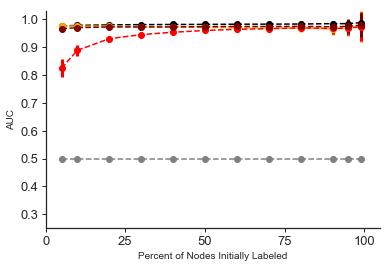

In [39]:
%matplotlib inline
from matplotlib.ticker import FixedLocator,LinearLocator,MultipleLocator, FormatStrFormatter

fig = plt.figure()
seaborn.set_style(style='white')
from mpl_toolkits.axes_grid1 import Grid
grid = Grid(fig, rect=111, nrows_ncols=(1,1),
            axes_pad=0.1, label_mode='L')
for i in range(4):
    if i == 0:
        grid[i].xaxis.set_major_locator(FixedLocator([0,25,50,75,100]))
        grid[i].yaxis.set_major_locator(FixedLocator([0.4, 0.5,0.6,0.7,0.8,0.9,1.2]))

        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_amherst_lbfgs, 
            yerr=se_wt_auc_amherst, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='black')
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_zgl_amherst,
            yerr=se_wt_auc_zgl_amherst, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='orange')
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_mv_amherst,
            yerr=se_wt_auc_mv_amherst, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='red')
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_mv2_amherst2, 
            yerr=se_wt_auc_mv2_amherst2, fmt='--o', capthick=2,
                alpha=1, elinewidth=3, color='maroon')
        
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_baseline_amherst, 
            yerr=se_wt_auc_baseline_amherst, fmt='--o', capthick=2,
           alpha=1, elinewidth=3, color='gray')
        
        grid[i].set_ylim(0.3,1.5)
        grid[i].set_xlim(-0.01,105)
        grid[i].set_ylim(0.25,1.03)

        grid[i].spines['right'].set_visible(False)
        grid[i].spines['top'].set_visible(False)
        grid[i].tick_params(axis='both', which='major', labelsize=13)
        grid[i].tick_params(axis='both', which='minor', labelsize=13)
        grid[i].set_xlabel('Percent of Nodes Initially Labeled')
        grid[i].set_ylabel('AUC')

grid[0].set_xticks([0,25, 50, 75, 100])
grid[0].set_yticks([0.3, 0.4, 0.5,0.6,0.7,0.8,0.9,1])#,1.05])
grid[0].minorticks_on()
grid[0].tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
pp = PdfPages('../../figures/pol_blogs_link_2hop_1hop.pdf')
pp.savefig()
pp.close()

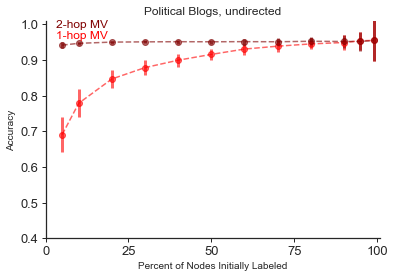

In [40]:
%matplotlib inline
from matplotlib.ticker import FixedLocator,LinearLocator,MultipleLocator, FormatStrFormatter

fig = plt.figure()
seaborn.set_style(style='white')
from mpl_toolkits.axes_grid1 import Grid
grid = Grid(fig, rect=111, nrows_ncols=(1,1),
            axes_pad=0.1, label_mode='L')
for i in range(4):
    if i == 0:
        grid[i].xaxis.set_major_locator(FixedLocator([0,25,50,75,100]))
        grid[i].yaxis.set_major_locator(FixedLocator([0.4, 0.5,0.6,0.7,0.8,0.9,1]))

        #grid[i].errorbar(percent_initially_labelled*100, mean_accuracy_amherst, 
        #    yerr=se_accuracy_amherst, fmt='--o', capthick=2,
        #    alpha=0.6, elinewidth=3, color='black')

        grid[i].errorbar(percent_initially_labelled*100, mean_accuracy_mv_amherst,
            yerr=se_accuracy_mv_amherst, fmt='--o', capthick=2,
            alpha=0.6, elinewidth=3, color='red')
        grid[i].errorbar(percent_initially_labelled*100, mean_accuracy_mv2_amherst2, 
            yerr=se_accuracy_mv2_amherst2, fmt='--o', capthick=2,
                alpha=0.6, elinewidth=3, color='maroon')
        
        #grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_baseline_amherst, 
        #    yerr=se_wt_auc_baseline_amherst, fmt='--o', capthick=2,
        #   alpha=0.6, elinewidth=3, color='gray')
        
        grid[i].set_ylim(0.3,1.1)
        grid[i].set_xlim(0,101)
        #grid[i].set_xlim(0,10)
        #grid[i].annotate('LINK', xy=(3, 0.77), 
        #         color='black', alpha=1, size=12)
        grid[i].annotate('2-hop MV', xy=(3, 0.99), 
                 color='maroon', alpha=1, size=12)
        grid[i].annotate('1-hop MV', xy=(3, 0.96), 
                 color='red', alpha=1, size=12)
        
        #grid[i].annotate('ZGL', xy=(3, 0.90), 
        #         color='orange', alpha=1, size=12)
        #grid[i].annotate('Baseline', xy=(3, 0.68), 
        #         color='gray', alpha=1, size=12)
        grid[i].set_ylim(0.49,1.01)
        #grid[i].set_xlim(0,100)
        grid[i].spines['right'].set_visible(False)
        grid[i].spines['top'].set_visible(False)
        grid[i].tick_params(axis='both', which='major', labelsize=13)
        grid[i].tick_params(axis='both', which='minor', labelsize=13)
        grid[i].set_xlabel('Percent of Nodes Initially Labeled')
        grid[i].set_ylabel('Accuracy')
        grid[i].set_title('Political Blogs, undirected')

#plt.setp(ax1, xticks=[0,25, 50, 75, 100], xticklabels=['0', '25', '50', '75', '100'])
grid[0].set_xticks([0,25, 50, 75, 100])
grid[0].set_yticks([ 0.4, 0.5,0.6,0.7,0.8,0.9,1])


grid[0].minorticks_on()
grid[0].tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)

pp = PdfPages('../../figures/pol_blogs_link_2hop_1hop_accuracy_niter_'+str(n_iter)+'.pdf')
pp.savefig()
pp.close()